In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Ganesh Baskar\\OneDrive\\Documents\\Data\\kidney_disease - kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# information about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
#Handling null values  
df.isnull().sum()/len(df)

id                0.0000
age               0.0225
bp                0.0300
sg                0.1175
al                0.1150
su                0.1225
rbc               0.3800
pc                0.1625
pcc               0.0100
ba                0.0100
bgr               0.1100
bu                0.0475
sc                0.0425
sod               0.2175
pot               0.2200
hemo              0.1300
pcv               0.1750
wc                0.2625
rc                0.3250
htn               0.0050
dm                0.0050
cad               0.0050
appet             0.0025
pe                0.0025
ane               0.0025
classification    0.0000
dtype: float64

<Axes: >

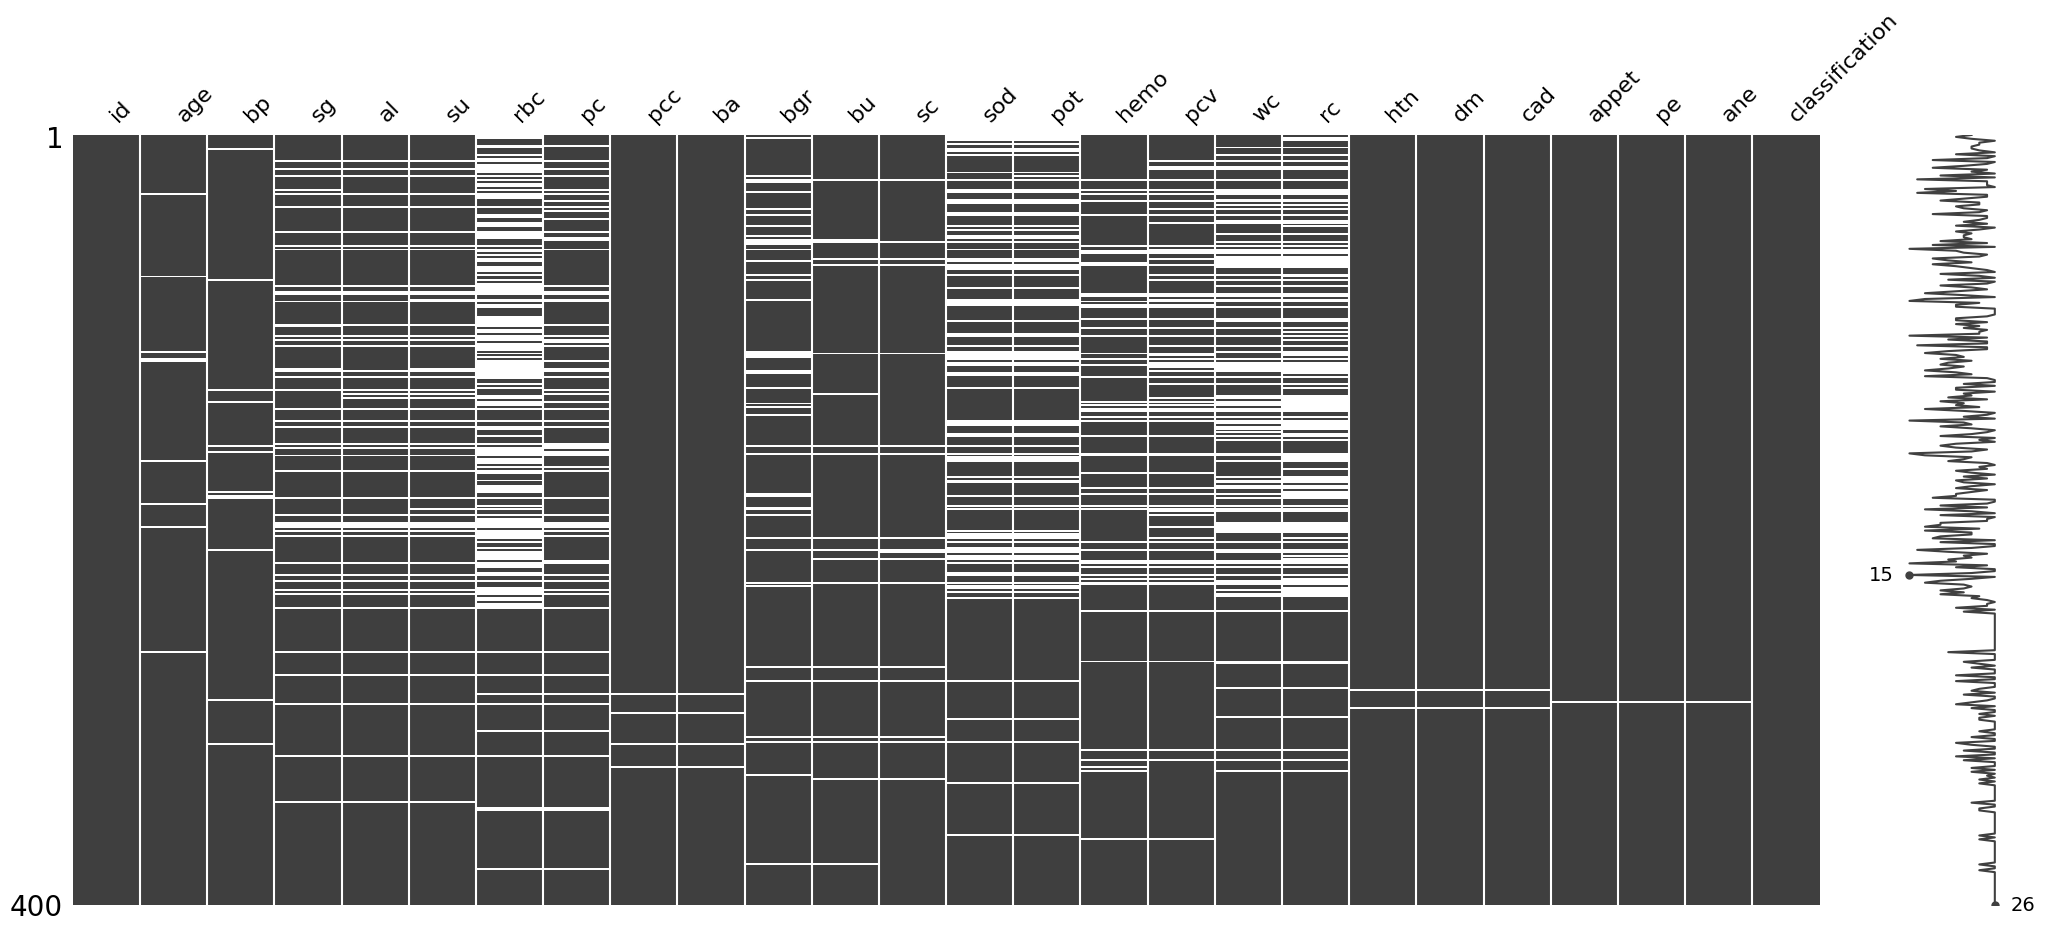

In [7]:
import missingno as msno
msno.matrix(df)

<Axes: >

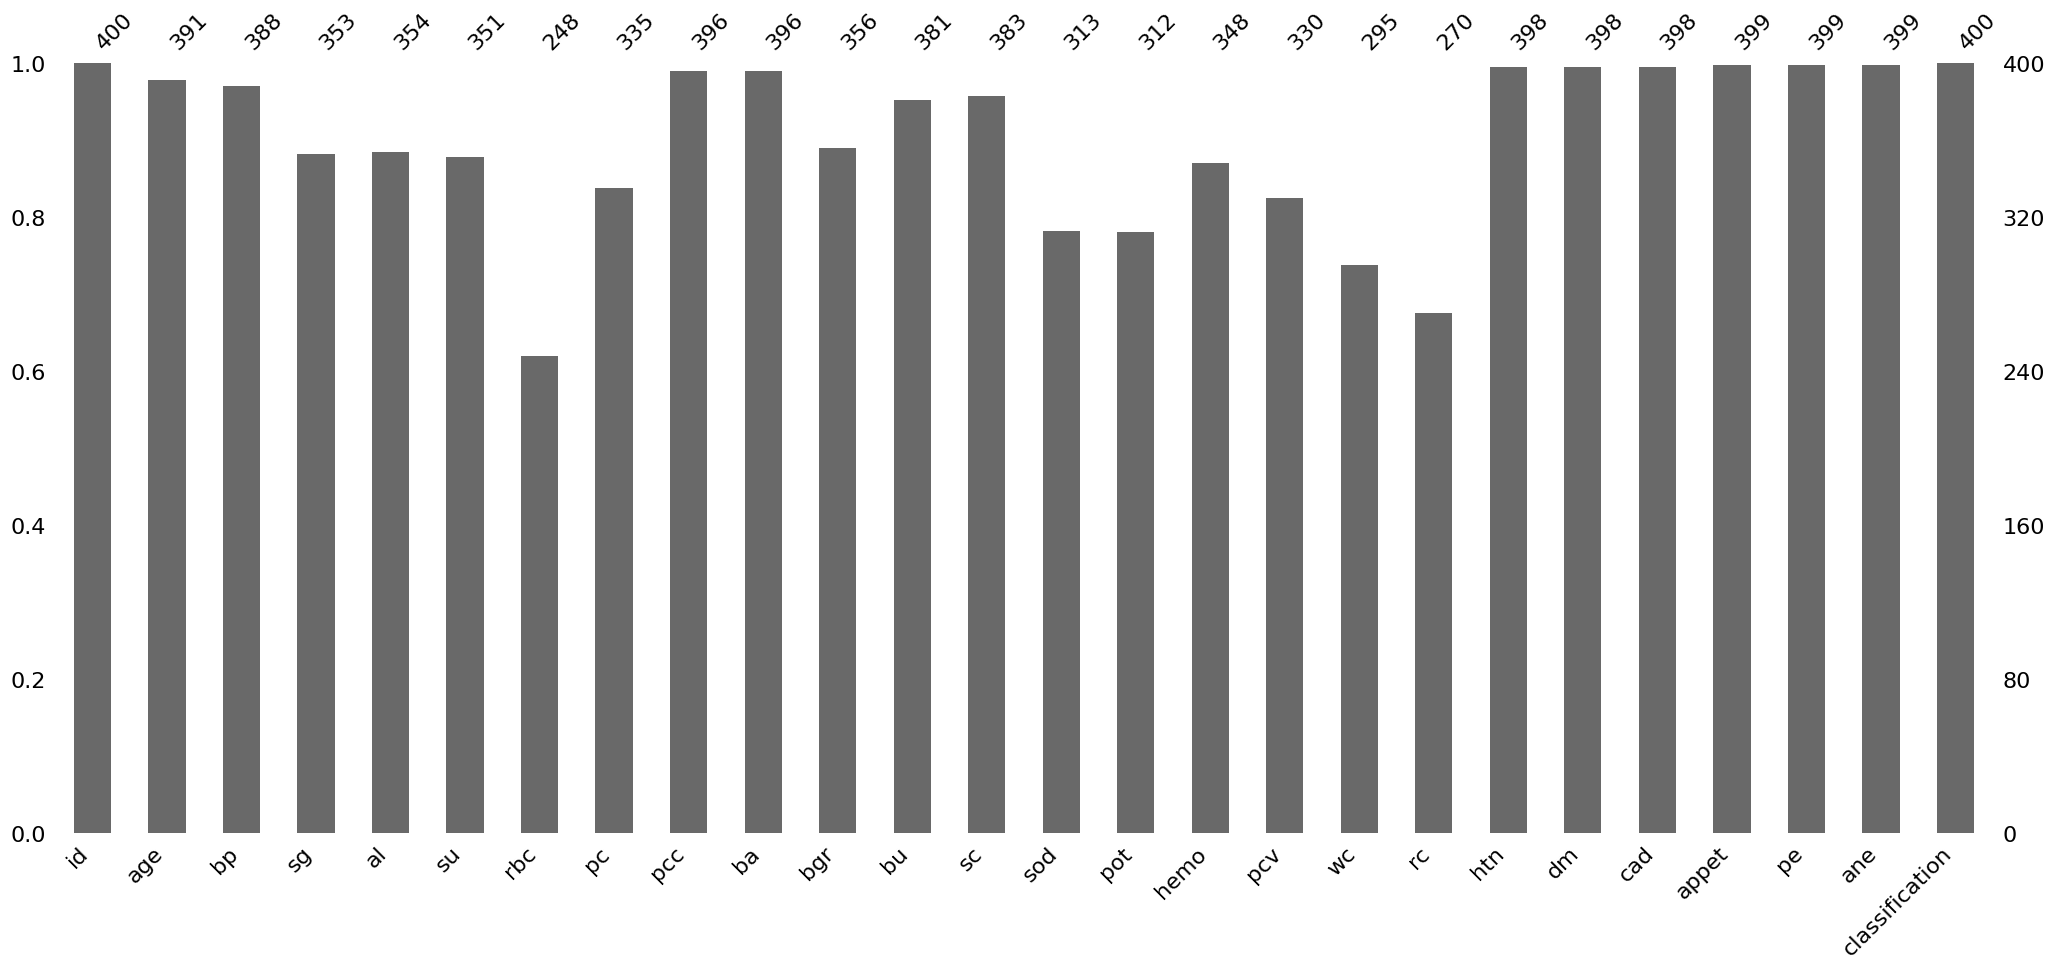

In [8]:
msno.bar(df)

Text(0.5, 1.0, 'counts for kidney Disease(Classification Target)')

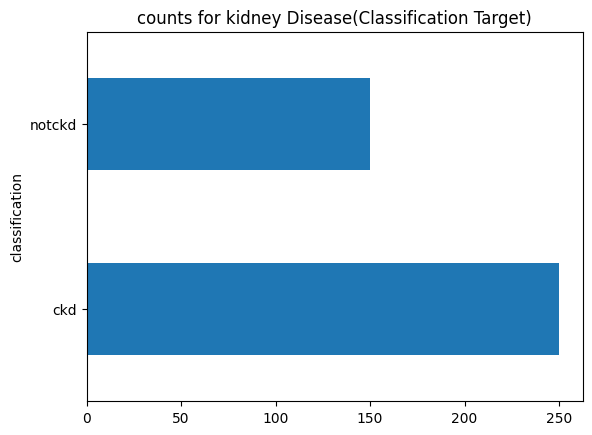

In [9]:
df['classification'].value_counts().plot(kind='barh').set_title('counts for kidney Disease(Classification Target)')

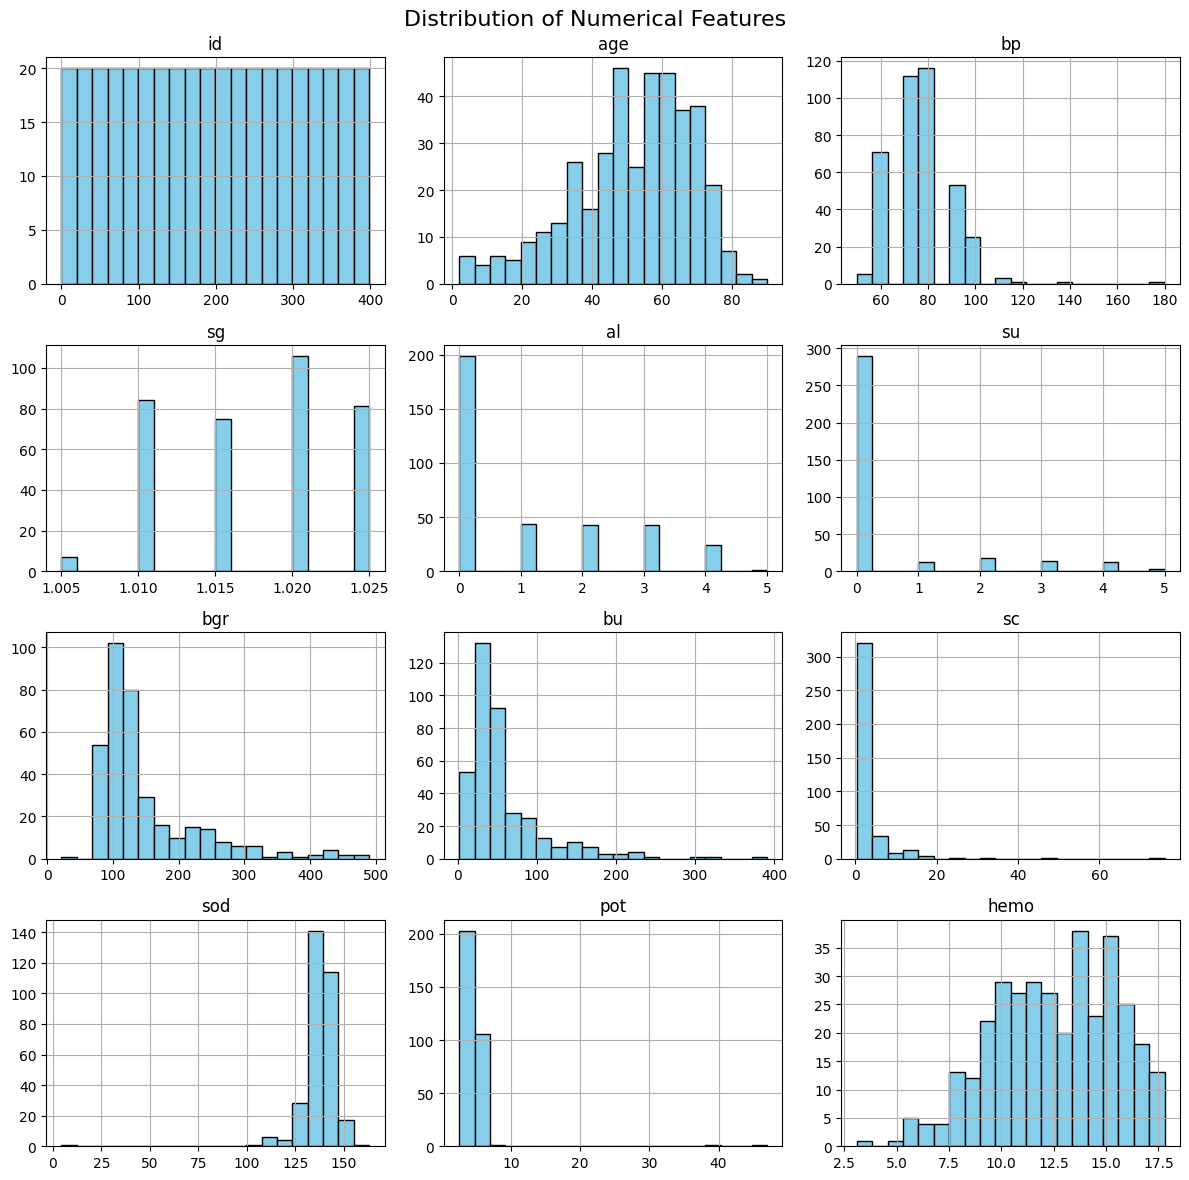

In [12]:
# Visualize the distribution of all numerical features in the dataset
import matplotlib.pyplot as plt

# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for all numerical columns
df[num_cols].hist(
    figsize=(12, 12),
    bins=20,
    color='skyblue',
    edgecolor='black'
)

plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

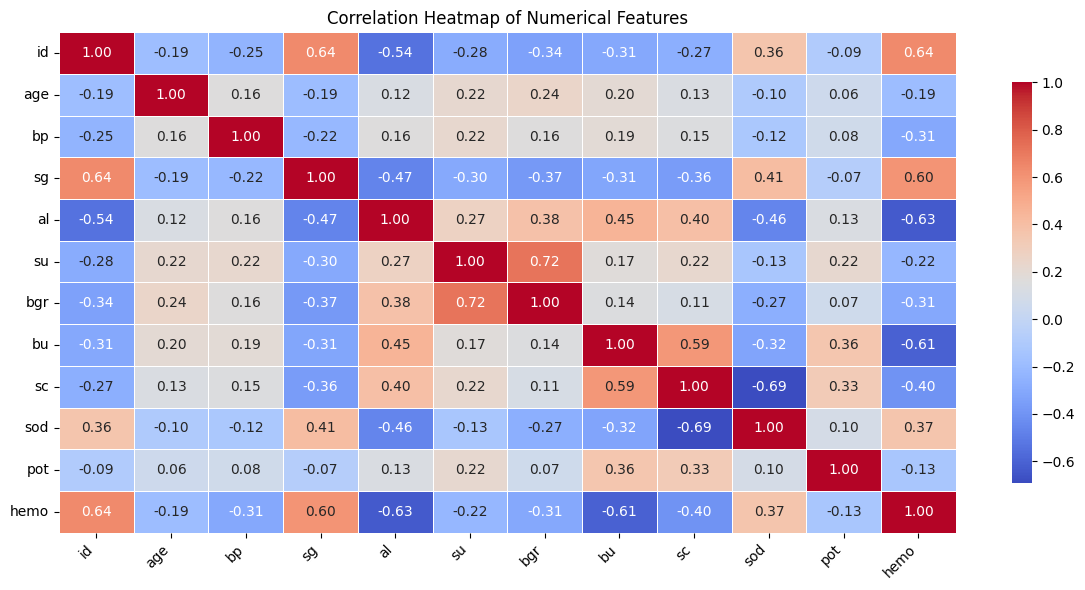

In [14]:
# Generate a heatmap to visualize correlation between numerical features
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix (numerical columns only)
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    data=corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

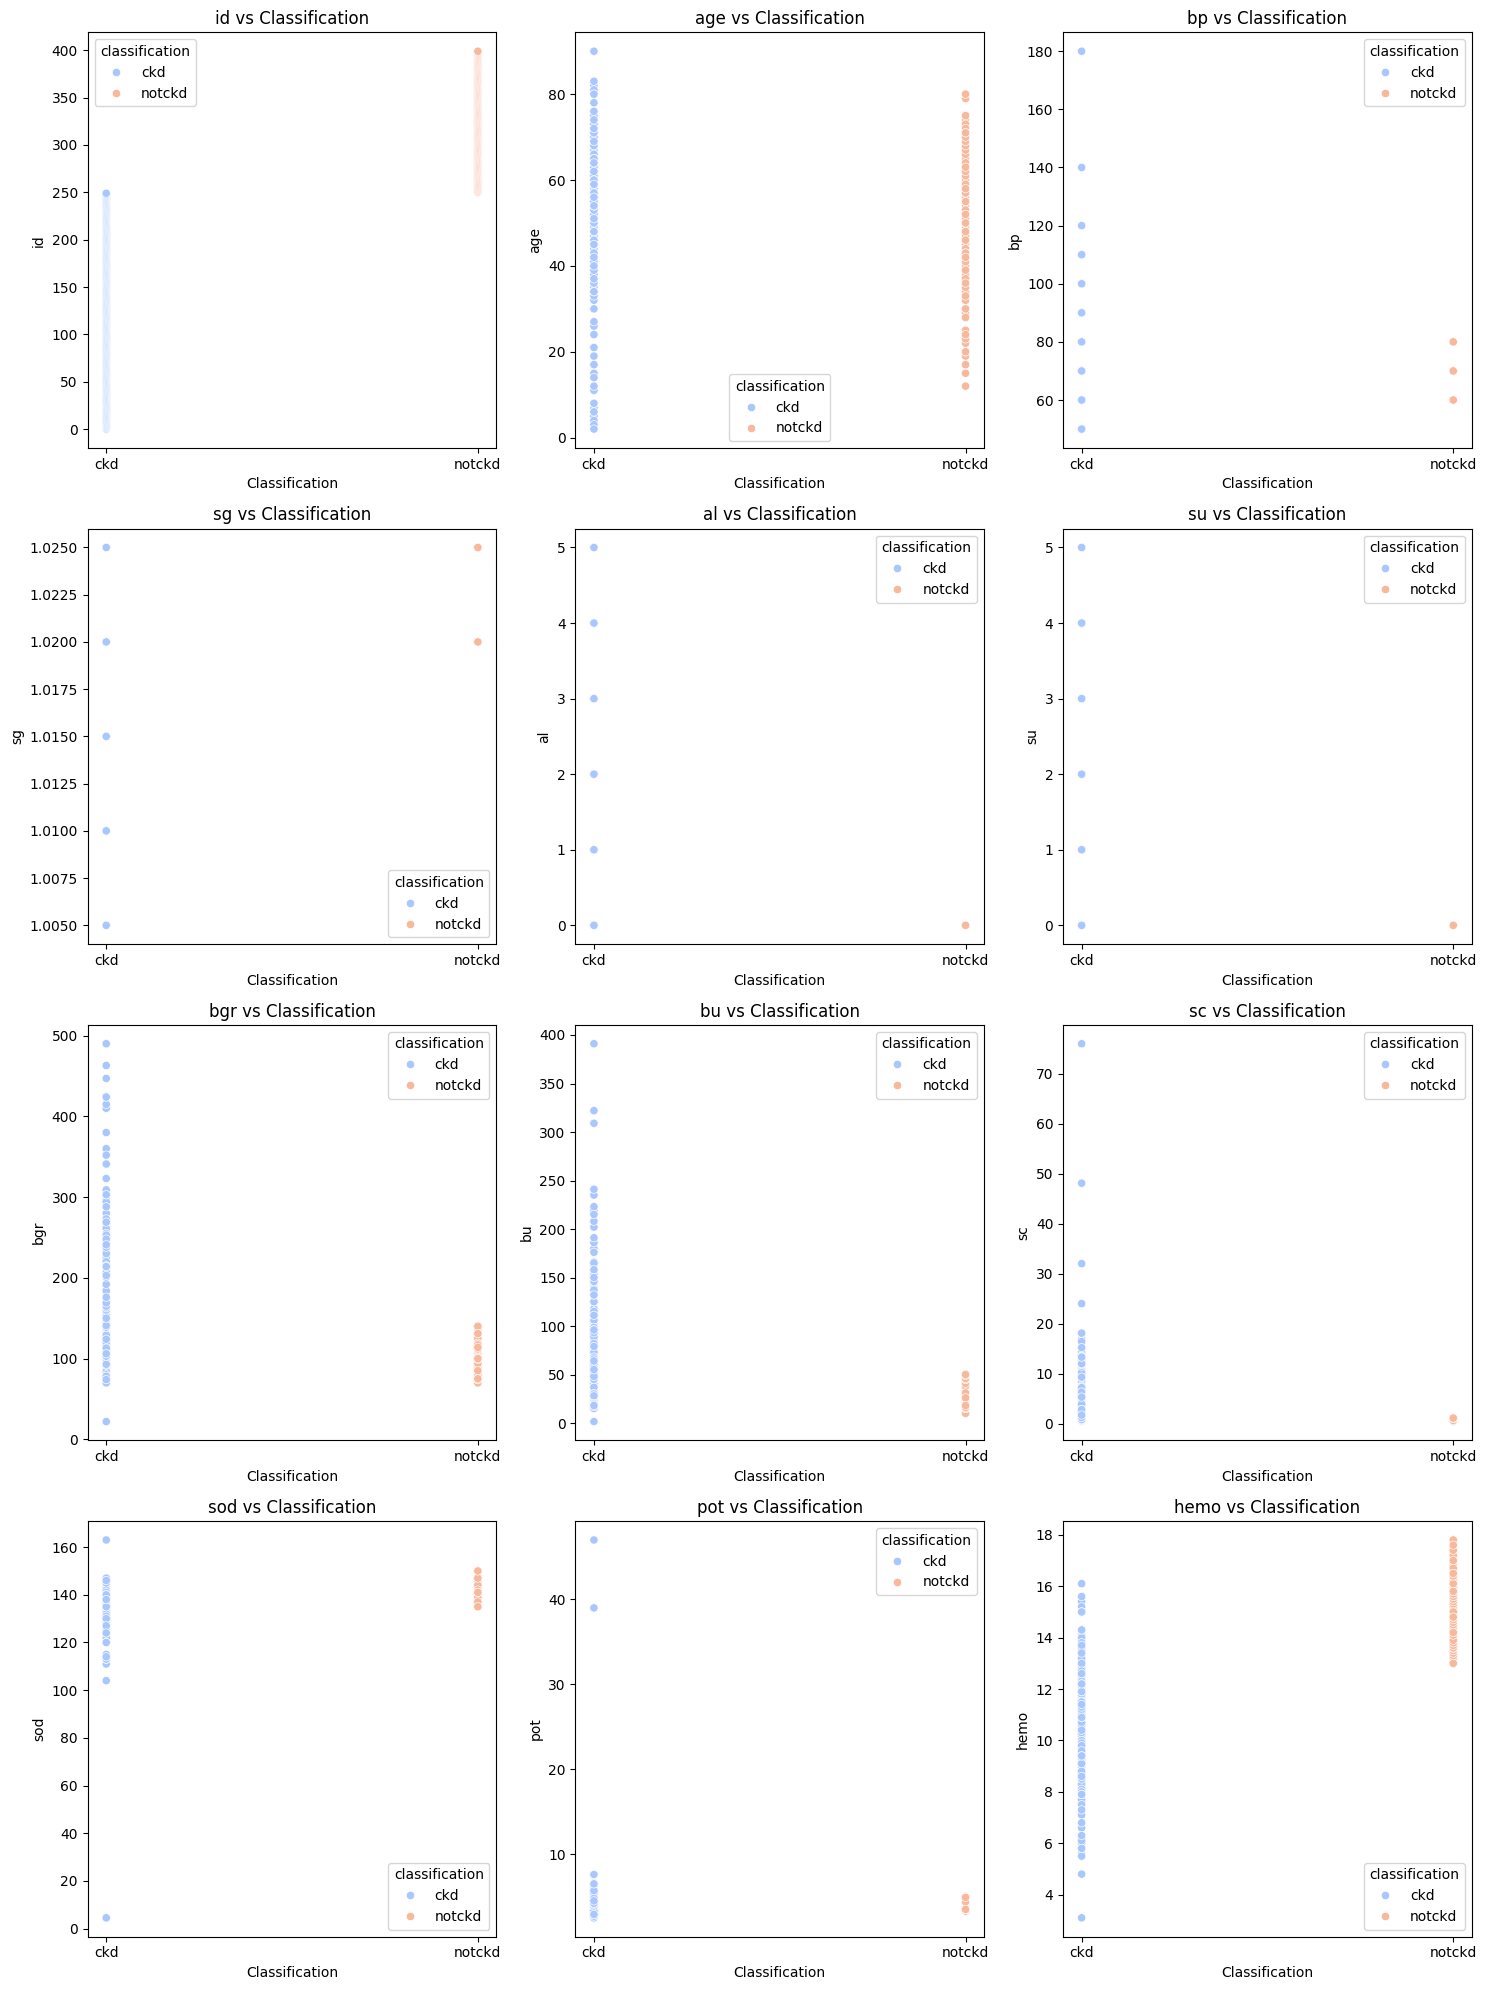

In [16]:
# Scatterplot grid to explore numerical features against classification
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Set number of columns and calculate rows dynamically
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

# Configure figure size based on number of rows
plt.figure(figsize=(15, 5 * n_rows))

# Create subplots for each numerical feature
for i, feature in enumerate(num_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(
        data=df,
        x="classification",
        y=feature,
        hue="classification",
        palette="coolwarm"
    )
    plt.title(f"{feature} vs Classification")
    plt.xlabel("Classification")
    plt.ylabel(feature)

# Optimize layout for better spacing
plt.tight_layout()
plt.show()

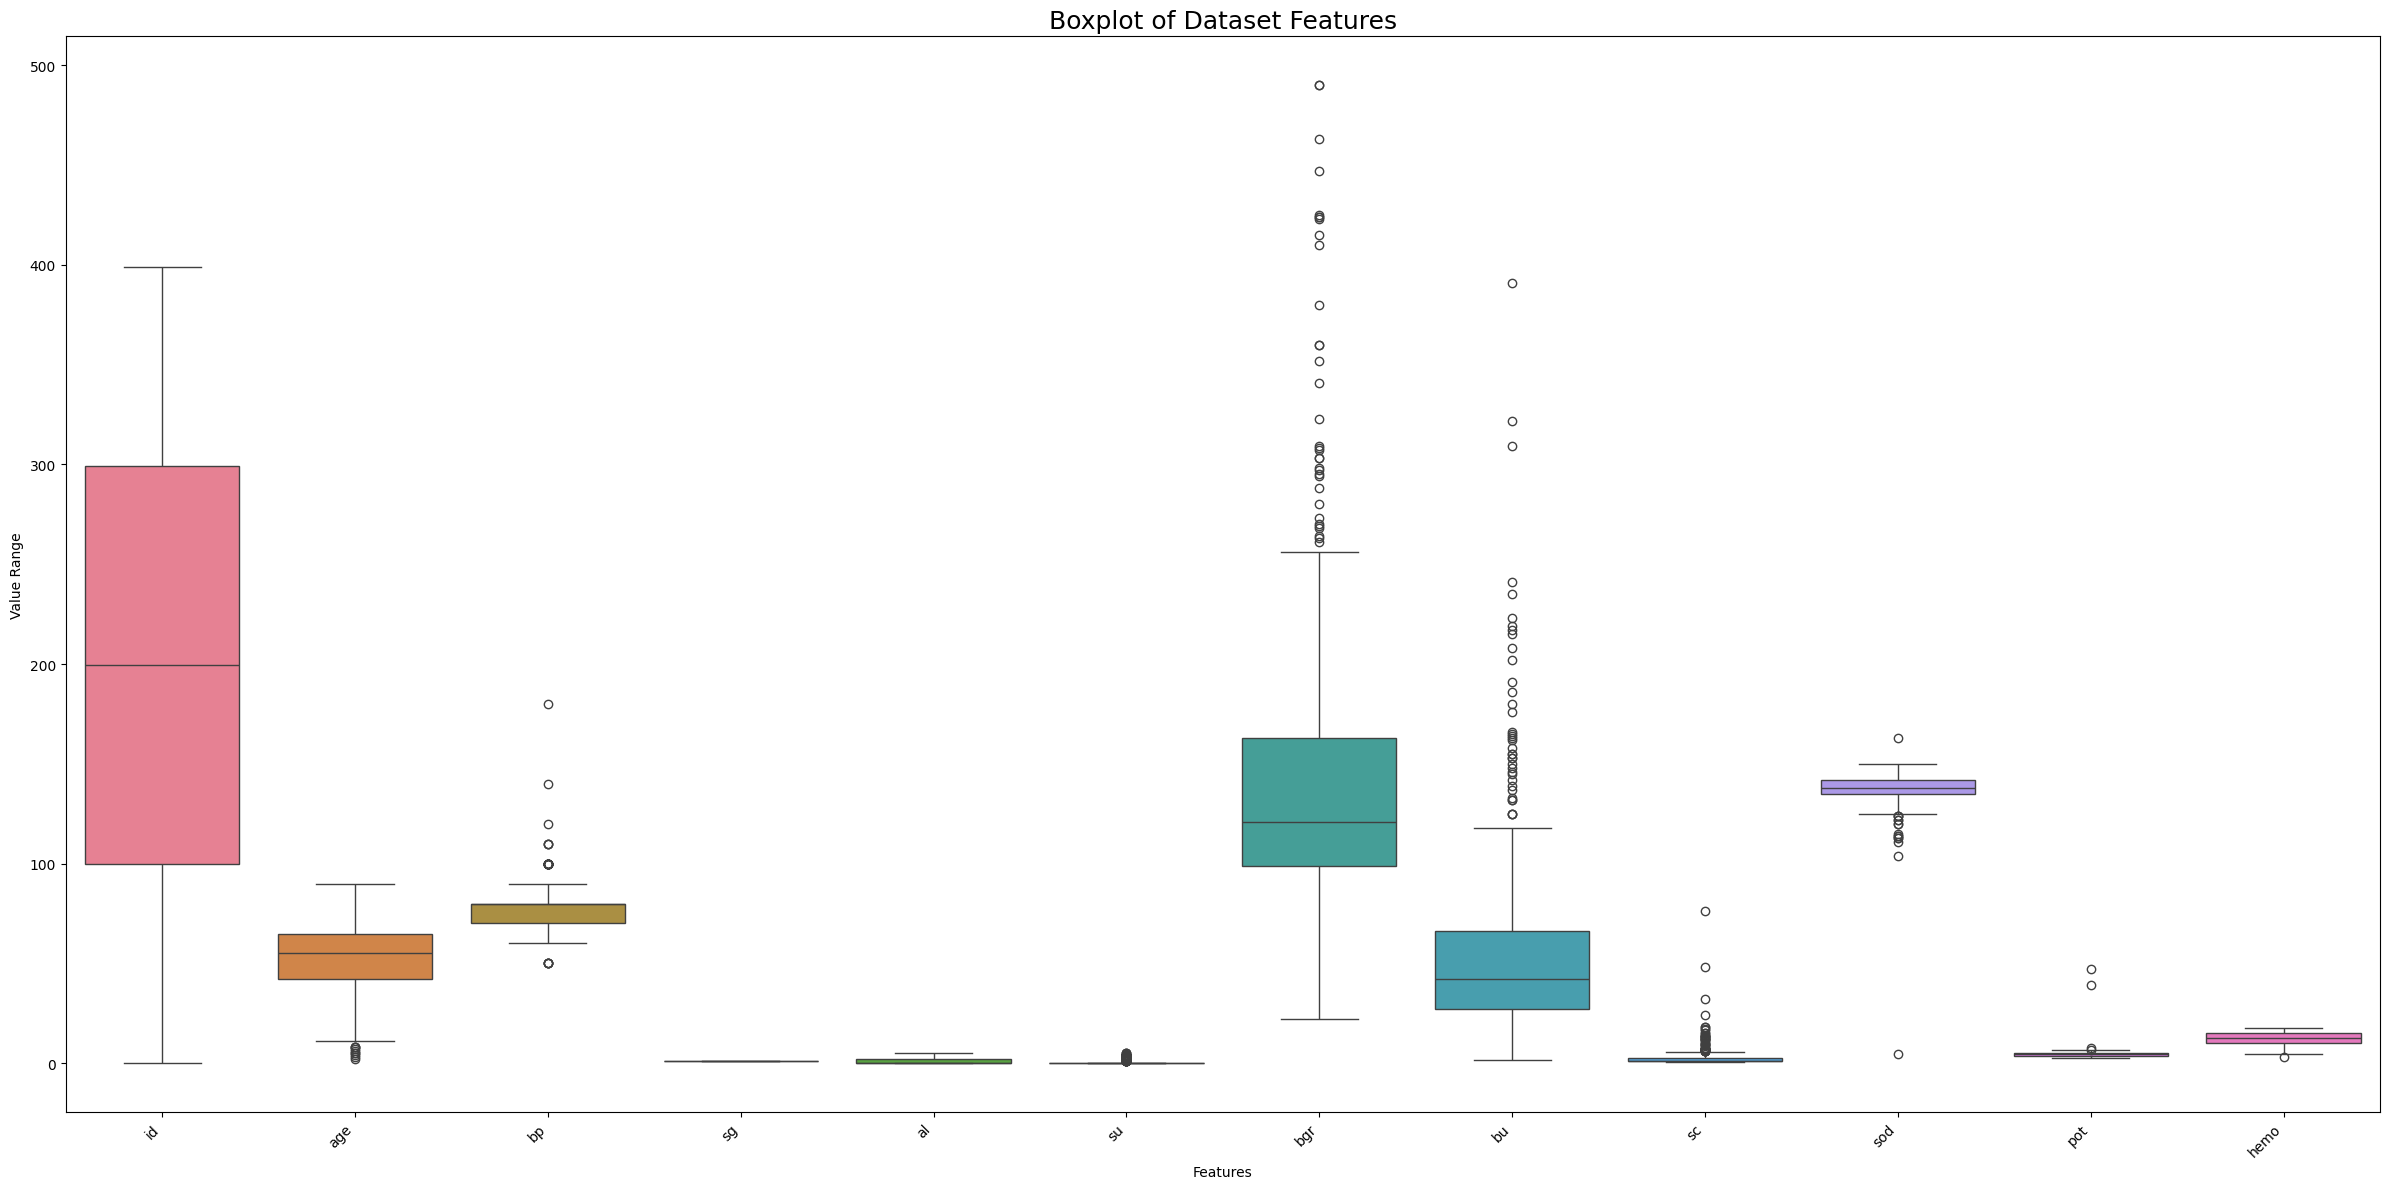

In [17]:
# Create a large-format boxplot to explore feature distributions
plt.figure(figsize=(24, 12))
sns.boxplot(data=df)
plt.title("Boxplot of Dataset Features", fontsize=18)
plt.xlabel("Features")
plt.ylabel("Value Range")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_23428\2464871562.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_23428\2464871562.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_23428\2464871562.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_23428\2464871562.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

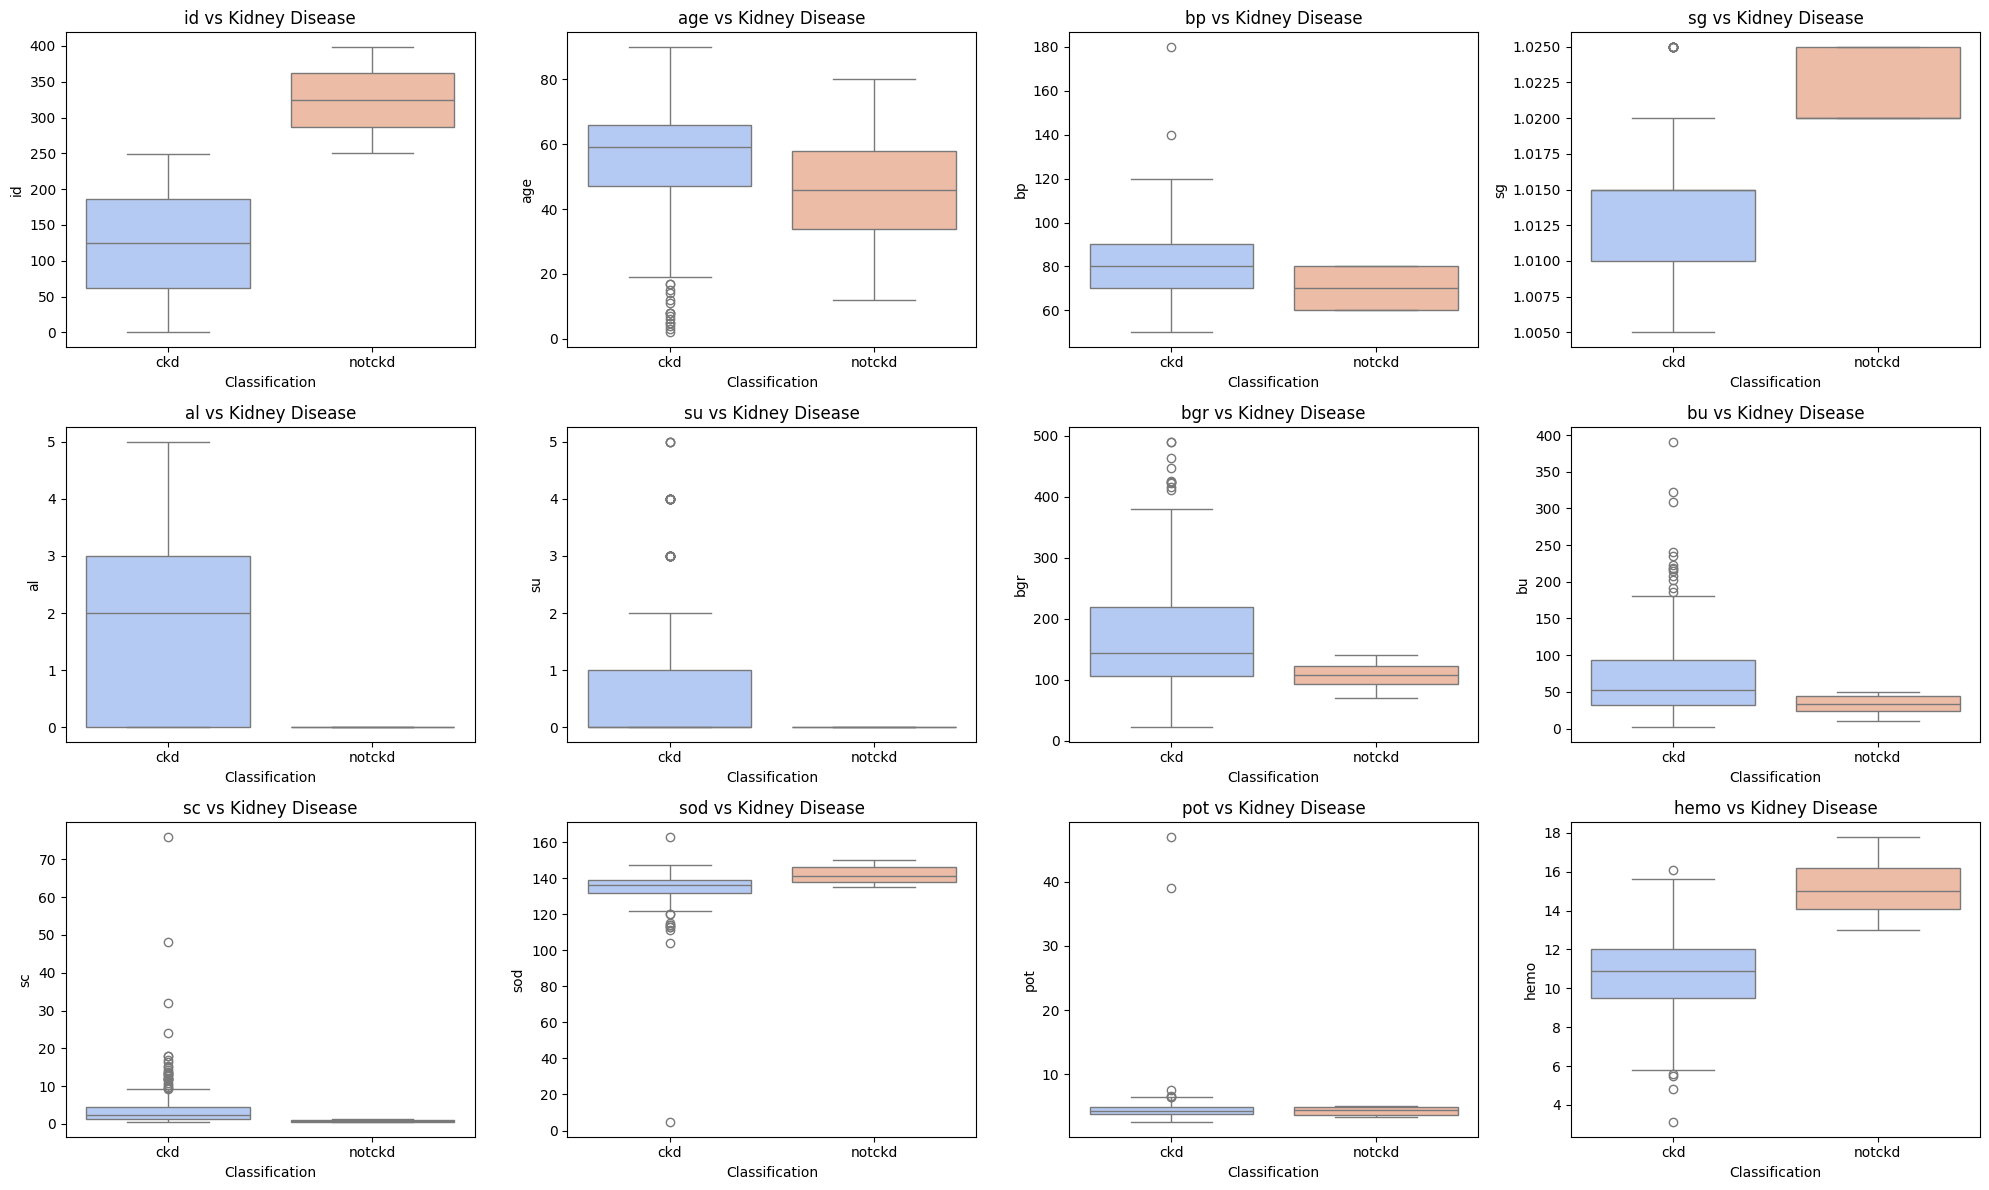

In [18]:
# Set up grid dimensions dynamically based on number of features
n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, feature in enumerate(num_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(
        data=df,
        x="classification",
        y=feature,
        palette="coolwarm"
    )
    plt.title(f"{feature} vs Kidney Disease")
    plt.xlabel("Classification")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [22]:
#Handing Numerical Columns By imputing median values
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [23]:
#handling categorical columns by imputing Mode values
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [24]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [26]:
# Convert categorical columns to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
encoder = LabelEncoder()

# Apply encoding to each categorical column
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Display the first 5 rows of the transformed DataFrame
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,30,69,30,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,24,53,30,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,17,67,30,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,18,59,17,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,21,65,24,0,0,0,0,0,0,0


In [27]:
# Standardize numerical columns using MinMaxScaler (range: 0 to 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaling across all numerical features
df[num_cols] = scaler.fit_transform(df[num_cols])

# Preview the first 5 rows of the scaled dataset
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.000000,0.522727,0.230769,0.75,0.2,0.0,1,1,0,0,...,30,69,30,1,1,0,0,0,0,0
1,0.002506,0.056818,0.000000,0.75,0.8,0.0,1,1,0,0,...,24,53,30,0,0,0,0,0,0,0
2,0.005013,0.681818,0.230769,0.25,0.4,0.6,1,1,0,0,...,17,67,30,0,1,0,1,0,1,0
3,0.007519,0.522727,0.153846,0.00,0.8,0.0,1,0,1,0,...,18,59,17,1,0,0,1,1,1,0
4,0.010025,0.556818,0.230769,0.25,0.4,0.0,1,1,0,0,...,21,65,24,0,0,0,0,0,0,0


# Feature Scaling

In [28]:
x = df.drop(columns=['id','classification'])
y = df['classification']

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train)

          age        bp    sg   al   su  rbc  pc  pcc  ba       bgr  ...  \
62   0.147727  0.076923  0.75  0.6  0.0    1   1    0   0  0.136752  ...   
319  0.318182  0.076923  0.75  0.0  0.0    1   1    0   0  0.247863  ...   
152  0.420455  0.153846  0.25  0.0  0.0    1   1    0   0  0.211538  ...   
306  0.568182  0.230769  0.75  0.0  0.0    1   1    0   0  0.226496  ...   
90   0.693182  0.384615  0.25  0.4  0.4    1   1    0   1  0.551282  ...   
..        ...       ...   ...  ...  ...  ...  ..  ...  ..       ...  ...   
40   0.500000  0.307692  0.25  0.4  0.0    1   0    0   0  0.164530  ...   
308  0.465909  0.230769  1.00  0.0  0.0    1   1    0   0  0.126068  ...   
16   0.511364  0.153846  0.50  0.4  0.0    1   1    0   0  0.164530  ...   
55   0.375000  0.230769  0.00  0.6  0.0    0   1    0   0  0.211538  ...   
13   0.750000  0.153846  0.75  0.0  0.0    1   1    0   0  0.162393  ...   

         hemo  pcv  wc  rc  htn  dm  cad  appet  pe  ane  
62   0.537415   19  68  16  

# logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score

kidney_model = LogisticRegression()
kidney_model.fit(x_train,y_train)
y_pred = kidney_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 0.9459459459459459
recall score:1.0
f1 score:0.9722222222222222
roc_auc score:0.9777777777777779


C:\Users\Ganesh Baskar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score

kidney_model = DecisionTreeClassifier()
kidney_model.fit(x_train,y_train)
y_pred = kidney_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 1.0
recall score:1.0
f1 score:1.0
roc_auc score:1.0


# Random Forest classification

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score

kidney_model_A = RandomForestClassifier(n_estimators=100)
kidney_model_A.fit(x_train,y_train)
y_pred = kidney_model_A.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 1.0
recall score:1.0
f1 score:1.0
roc_auc score:1.0


In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

kidney_model = BaggingClassifier()
kidney_model.fit(x_train,y_train)
y_pred = kidney_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 1.0
recall score:1.0
f1 score:1.0
roc_auc score:1.0


# K Nearest Neignbors classification

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

kidney_model = KNeighborsClassifier()
kidney_model.fit(x_train,y_train)
y_pred = kidney_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 0.8529411764705882
recall score:0.8285714285714286
f1 score:0.8405797101449275
roc_auc score:0.8587301587301588


# Support Vector Classifier

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

kidney_model = SVC()
kidney_model.fit(x_train,y_train)
y_pred = kidney_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(f"precision score: {precision}")
print(f"recall score:{recall}")
print(f"f1 score:{f1}")
print(f"roc_auc score:{auc}")

precision score: 0.8387096774193549
recall score:0.7428571428571429
f1 score:0.7878787878787878
roc_auc score:0.8158730158730159


# Create a performance summary DataFrame for classification models

In [36]:
import pandas as pd

performance_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Bagging Classifier",
        "K-Nearest Neighbors",
        "Support Vector Machine"
    ],
    "Precision": [1.00, 0.86, 0.96, 0.90, 0.925, 0.66],
    "Recall": [0.93, 1.00, 1.00, 0.93, 0.79, 0.68],
    "F1 Score": [0.96, 0.98, 1.00, 0.91, 0.84, 0.67],
    "ROC AUC": [0.96, 0.96, 0.99, 0.93, 0.86, 0.74]
})

# Preview the model performance table
performance_df

,Model,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,1.000,0.93,0.96,0.96
1,Decision Tree,0.860,1.00,0.98,0.96
2,Random Forest,0.960,1.00,1.00,0.99
3,Bagging Classifier,0.900,0.93,0.91,0.93
4,K-Nearest Neighbors,0.925,0.79,0.84,0.86
5,Support Vector Machine,0.660,0.68,0.67,0.74


# Random forest Classifier is the best model to predict

In [37]:
import pickle


with open('Kidney_model.pkl', 'wb') as file:
    pickle.dump(kidney_model_A, file)